**IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error

**IMPORT DATA**

In [3]:
path_database = '/content/Marketing_Data.csv'

In [4]:
data = pd.read_csv("Marketing_Data.csv")

Data yang digunakan adalah dataset marketing yang bersumber dari kaggle. Data ini merupakan data advertising experiment antara biaya Sosial Media dan Sales (dalam ribuan Dollar ($)).

Data ini akan dilakukan proses regresi yaitu simple linear regression dan mutiple regression.

**Description Data and Cleaning Data**

In [5]:
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Memiliki 4 variabel dengan 171 baris/responden/eksperimen

In [7]:
# View descriptive statistics
print(data.describe())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


In [8]:
data.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

data tersebut tidak memiliki null/kosong

In [9]:
print("Number of duplicated data: {}". format(data.duplicated().sum()))

Number of duplicated data: 0


data tersebut tidak ada yang duplikat

In [10]:
def missing_value(data):
    for col in data.columns.tolist():
        print('Missing values percentage of {}: {}%'.format(col, data[col].isnull().sum()/len(data[col])))
missing_value(data)

Missing values percentage of youtube: 0.0%
Missing values percentage of facebook: 0.0%
Missing values percentage of newspaper: 0.0%
Missing values percentage of sales: 0.0%


tidak memiliki missing value

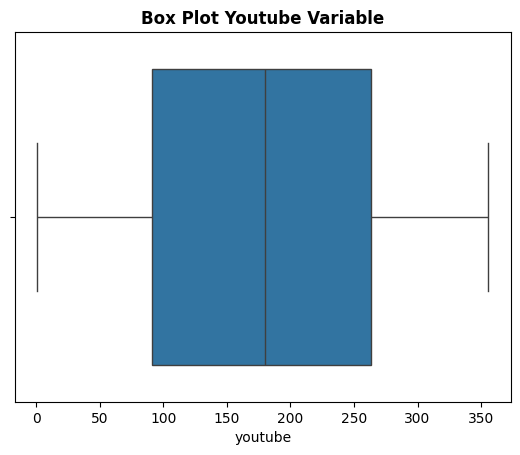

In [11]:
sns.boxplot(x = data['youtube'])
plt.title("Box Plot Youtube Variable", weight='bold')
plt.show()

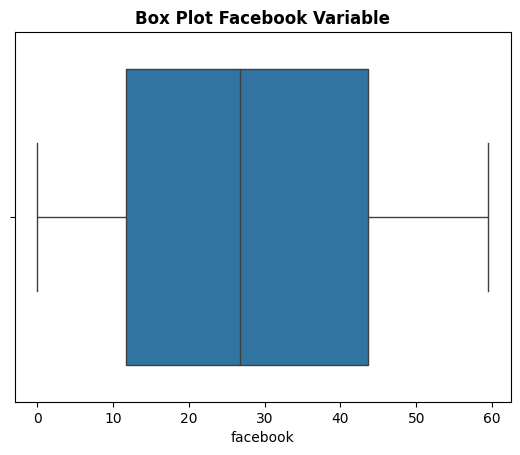

In [12]:
sns.boxplot(x = data['facebook'])
plt.title("Box Plot Facebook Variable", weight='bold')
plt.show()

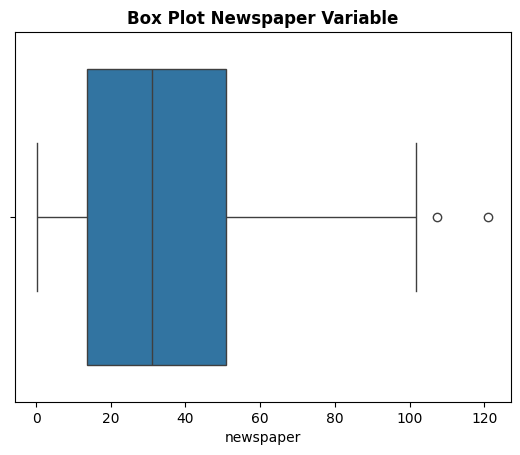

In [13]:
sns.boxplot(x = data['newspaper'])
plt.title("Box Plot Newspaper Variable", weight='bold')
plt.show()

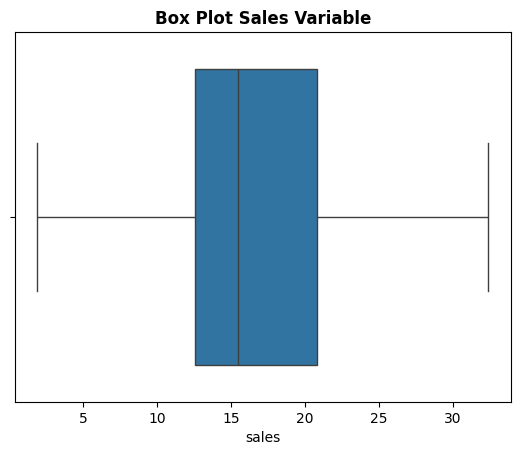

In [14]:
sns.boxplot(x = data['sales'])
plt.title("Box Plot Sales Variable", weight='bold')
plt.show()

Jika diliat dari gambar boxplot yang memiliki outlier adalah biaya dari koran/newspaper. Maka akan dilakukan remove outlier

In [15]:
#Using Outlier Formula to remove rows

lower_quartile = np.percentile(data["newspaper"],25) #Calculating lower_quartile
median = np.percentile(data["newspaper"],50) #Calculating median
upper_quartile = np.percentile(data["newspaper"],75) #Calculating upper_quartile

interquartile_range = upper_quartile - lower_quartile #Calculating interquartile_range(IQR)
lower_boundary = lower_quartile - 1.5*interquartile_range #Calculating lower_boundary
upper_boundary = upper_quartile + 1.5*interquartile_range #Calculating upper_boundary

#tweet content length smaller than lower_boundary or larger than upper_boundary will be removed
print("lower_boundary:",lower_boundary)
print("upper_boundary:",upper_boundary)

lower_boundary: -41.97
upper_boundary: 106.59


In [16]:
#Remove outliers
df = data[(data["newspaper"]>=lower_boundary)&(data["newspaper"]<=upper_boundary)]

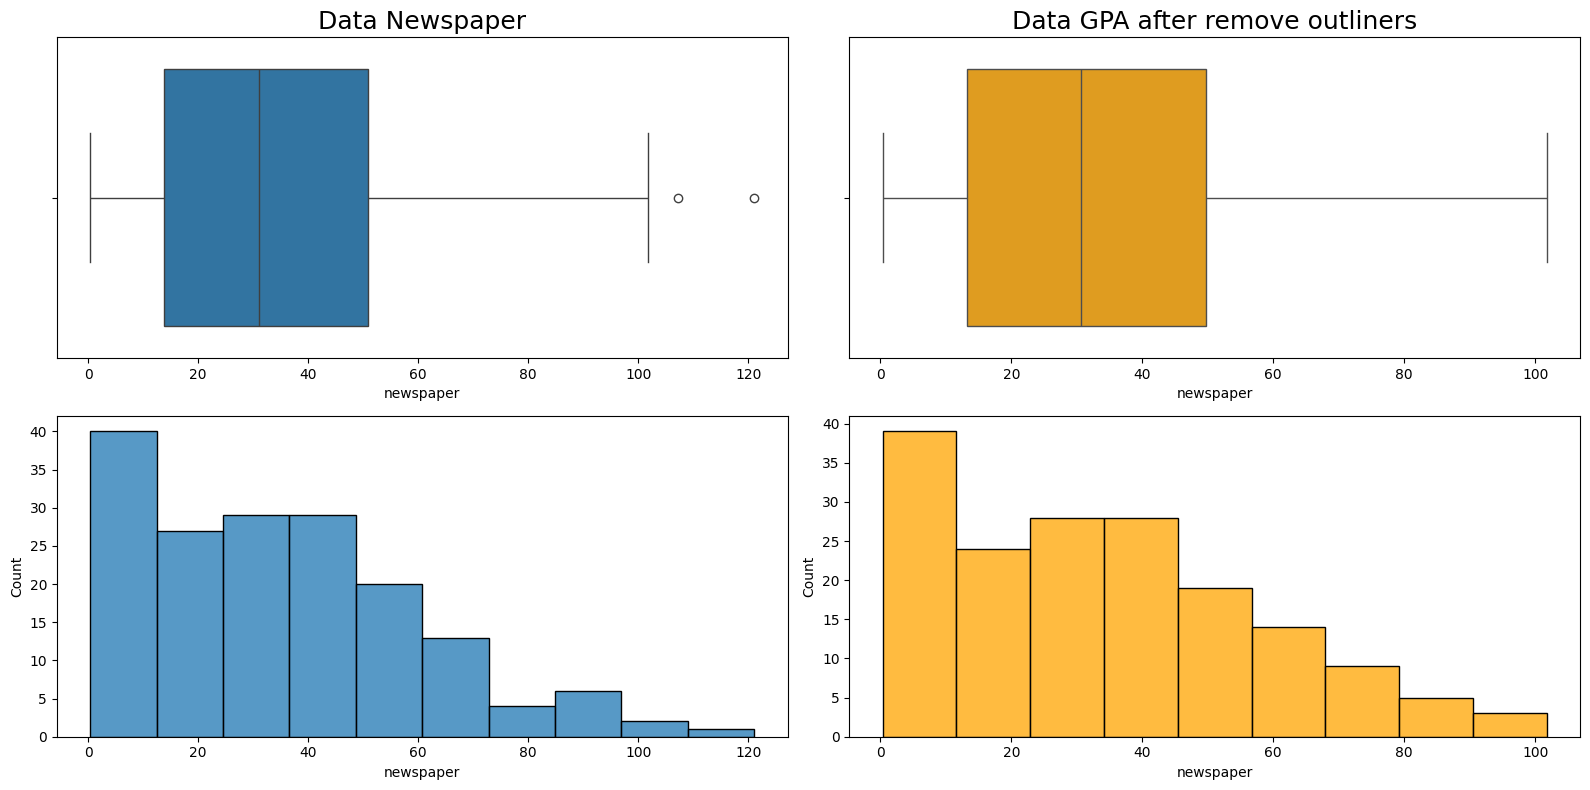

In [17]:
#Compare data newspaper before and after remove outliers

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

#distribution of tweet content length
sns.boxplot(x="newspaper",data=data,ax=ax[0,0]).set_title("Data Newspaper",fontsize=18)
sns.boxplot(x="newspaper",data=df,ax=ax[0,1],color="orange").set_title("Data GPA after remove outliners",fontsize=18)

#frequency of tweet content length
sns.histplot(x="newspaper",data=data,ax=ax[1,0])
sns.histplot(x="newspaper",data=df,ax=ax[1,1],color="orange")

fig.tight_layout()

dari gambar boxplot tersebut outlier sudah tidak ada yang diwarnai oleh warna orange

**CHECKING DATA**

Akan dicek apakah terdapat hubungan linear antara sales dengan youtube, facebook dan newspaper

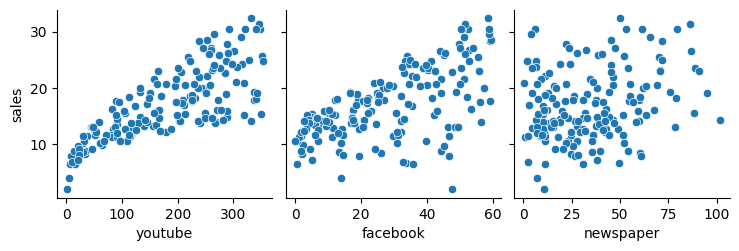

In [18]:
sns.pairplot(df, x_vars=['youtube','facebook','newspaper'],
             y_vars='sales')

Dari grafik tersebut terdapat hubungan sales sebagai variabel dependen dengan masing-masing variabel youtube, facebook, dan newspaper. Dilihat dari garis linear, hubungan antar sales dan youtube lebih linear dibandingkan yang lain.

<Axes: >

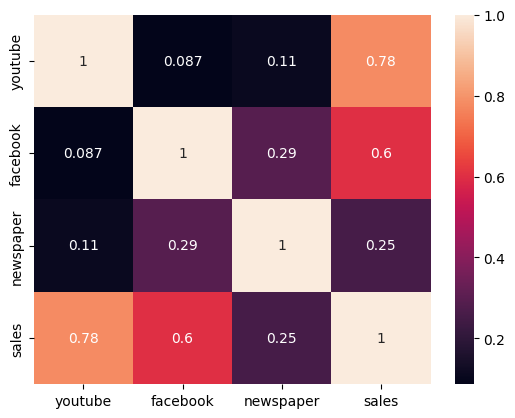

In [19]:
sns.heatmap(data.corr(), annot=True)

Dilihat dari korelasinya, korelasi sales dengan youtube lebih tinggi yaitu 0.75 sehingga akan dilakukan proses simple regression antara sales dengan youtube

In [20]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.092200,0.110262,0.776382
facebook,0.092200,1.000000,0.270263,0.614581
newspaper,0.110262,0.270263,1.000000,0.253835
sales,0.776382,0.614581,0.253835,1.000000


In [21]:
df.cov()

,youtube,facebook,newspaper,sales
youtube,10284.875668,167.134400,262.698646,493.543932
facebook,167.134400,319.502300,113.489900,68.859949
newspaper,262.698646,113.489900,551.908597,37.379776
sales,493.543932,68.859949,37.379776,39.291771


<ipython-input-22-c49349c49813>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['youtube'])


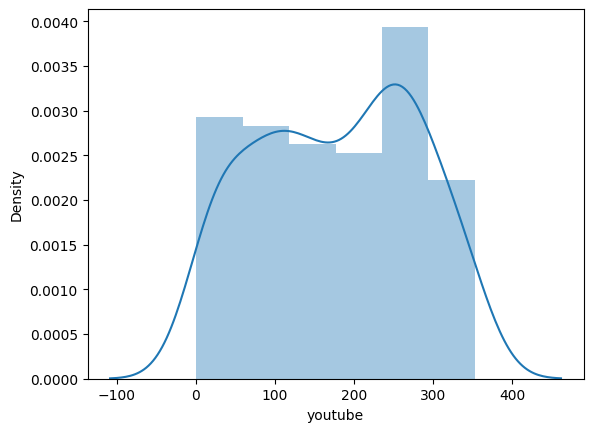

In [22]:
sns.distplot(df['youtube'])
plt.show()

<ipython-input-23-92e934411621>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['facebook'])


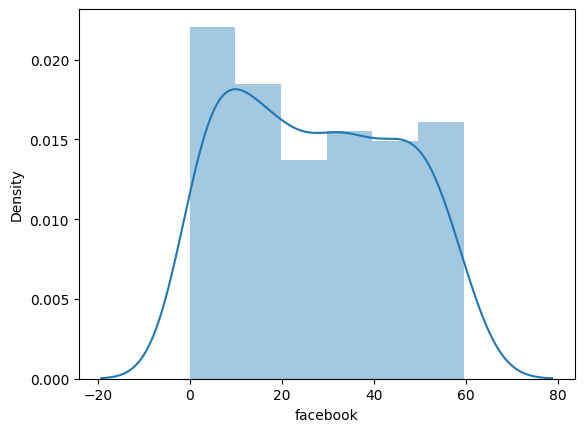

In [23]:
sns.distplot(df['facebook'])
plt.show()

<ipython-input-24-46deeb9b9d4a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newspaper'])


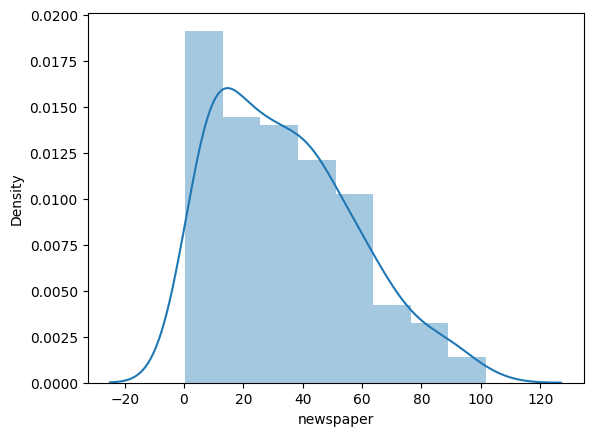

In [24]:
sns.distplot(df['newspaper'])
plt.show()

<ipython-input-25-5a4c7d70463e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'])


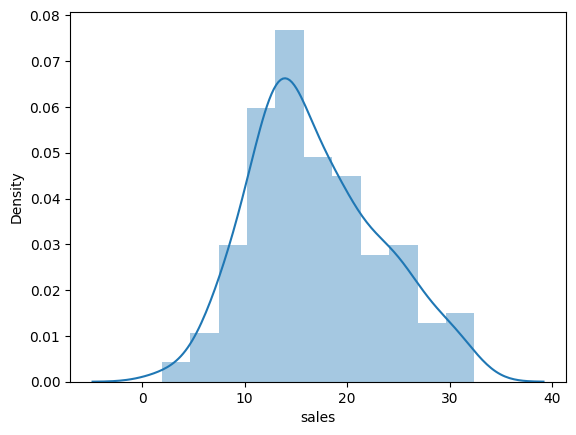

In [25]:
sns.distplot(df['sales'])
plt.show()

**SIMPLE LINEAR REGRESSION**

X = Youtube
Y = Sales

**UJI ASUMSI**

In [26]:
# getting dependent and independent variables
X = df[["youtube"]]
y = df['sales']

#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

#Call the regressor
reg = LinearRegression()
reg.fit(X, y)

#Apply the regressor
y_pred = reg.predict(X)

In [27]:
residuals = y.values-y_pred

A. Homoscedicity

In [28]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.1411701043771567), ('p-value', 0.27364399533002604)]

Homoscedicity

H0: Error terms are homoscedastic H1: Error terms are heteroscedastic

p-value > 0.05 then H0 accepted. So error terms are homoscedastic

Karena p-value = 0.2736 > 0.05, maka H0 diterima sehingga memenuhi asumsi homoskedasitas, memiliki variansi yang sama

B. Normality

In [29]:
from scipy.stats import shapiro
np.random.seed(1)
shapiro(residuals)

ShapiroResult(statistic=0.9887457489967346, pvalue=0.1979268491268158)

Ho : berdistribusi normal H1 : tidak berdistribusi normal

Karena p-value > 0.05, maka H0 diterima sehingga memenuhi asumsi normalitas.

C. Independency

In [30]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,4.274086,0.510666


H0: Autocorrelation is absent
H1: Autocorrelation is present

Karena p-value > 0.05, maka H0 diterima sehingga memenuhi asumsi independensi

D. Multikolinearitas

In [31]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable
y, X = dmatrices('sales ~ youtube', data=df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df)


    variable       VIF
0  Intercept  4.095607
1    youtube  1.000000


VIF yang memiliki nilai 1 berarti tidak ada korelasi antara variabel tersebut. VIF youtube 1. Sehingga tidak ada korelasi, tidak ada masalah multikolinearitas dalam model ini.

Dari uji asumsi tersebut, semua terpenuhi sehingga dilanjutkan pemodelan

**MODELLING**

In [45]:
X = df[["youtube"]]
y = df['sales']

In [46]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Call the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg = reg.fit(X_train, y_train)

# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

In [65]:
#Linear Regression Slope and Intercept
print("Model intercept, a:" , reg.intercept_)
print("Model slope, b:" , reg.coef_[0])

Model intercept, a: 8.370158122707538
Model slope, b: 0.0475994046643701


In [48]:
reg.coef_[0]

0.0475994046643701

In [49]:
reg.intercept_

8.370158122707538

Dengan model regresi y = b_0 + b_1*x, didapatkan nilai b_0 = 8.397587779275103 dan b_1 = 0.04674285794650904.

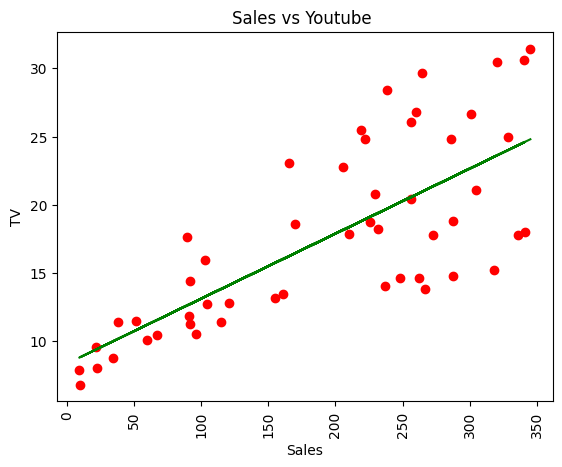

In [51]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color = "green")
plt.title("Sales vs Youtube ")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

In [52]:
# Calculate and print r2_score
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.5646


In [53]:
# Calculate and print Root Mean Square Error(RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Value: {:.4f}".format(rmse))

RMSE Value: 4.4103


**PREDICTION**

In [66]:
#Prediction Data
DataPrediksi=df[['youtube']]
DataPrediksi['Sales_Prediction']=reg.intercept_+ reg.coef_[0]*DataPrediksi['youtube']
DataPrediksi

<ipython-input-66-373a548f7d16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataPrediksi['Sales_Prediction']=reg.intercept_+ reg.coef_[0]*DataPrediksi['youtube']


,youtube,Sales_Prediction
0,84.72,12.402780
1,351.48,25.100397
2,135.48,14.818925
3,116.64,13.922153
4,318.72,23.541040
...,...,...
166,45.84,10.552115
167,113.04,13.750795
168,212.40,18.480272
169,340.32,24.569188


model simple regression linear merupakan rumus linear dalam bentuk y = b0 + b1*x1; dimana y merupakan keluaran atau outcome, dan x1 merupakan variable independen (predictor), juga b1 adalah kemiringan garis; juga dikenal sebagai koefisien regresi dan b0 adalah intersep yang diberi label konstan.

Prediksi model yang digunakan adalah model yang sudah dicari b0 dan b1 yaitu

y = 8.397587779275103 + 0.04674285794650904 x

dengan x merupakan data youtube yang ada dan bisa diganti yang lain selain di luar data tersebut sebagai contoh 200, 300, dll.

Masukan ke dalam persamaan

In [67]:
y = reg.intercept_ + reg.coef_[0]* 500

In [68]:
print("Predicted Sales :",y)

Predicted Sales : 32.169860454892586


Dengan biaya periklanan youtube sebesar 500 ribu dollar, maka diperkiraan sales sebesar 32.12 ribu dollar

**MUTIPLE LINEAR REGRESSION**

In [69]:
# getting dependent and independent variables
X = df.drop(['sales'], axis = 1)
y = df['sales']

#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

#Call the regressor
reg = LinearRegression()
reg.fit(X, y)

#Apply the regressor
y_pred = reg.predict(X)

In [70]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fit the regressor to the training data
reg = reg.fit(X_train, y_train)

# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

Rumus Multiple Linear Regression : y = b0 + b1 * x1 + b2 * x2 + b3 * x3

In [71]:
r_squared = r2_score(y_test,y_pred)

In [72]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [73]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))

Adjusted R Squared: % 91.34 R Squared: % 91.49


In [74]:
print("Intercept is ",reg.intercept_,"and Coefficients are", reg.coef_)

Intercept is  3.399949639681429 and Coefficients are [0.04549879 0.18246735 0.00846794]


* Koefisien sales : 3.399949639681429
* Koefisien youtube : 0.04549879
* Koefisien faecebook : 0.18246735
* Koefisien Newspaper : 0.00846794

**PREDICTION**

Akan dilakukan perkiraan sales dengan pengeluaran biaya budget sosial media sebesar youtube 500, facebook 500, dan newspaper 500

In [75]:
y = reg.intercept_ + reg.coef_[0] * 500 + reg.coef_[1] * 500 + reg.coef_[2] * 500

In [76]:
print("Predicted Sales :",y)

Predicted Sales : 121.61699021583428


Maka perkiraan sales sebesar 121.61699021583428 ribu dollar